<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/CDMX/Regresi%C3%B3n_No_Lineal/R_NoLineal_CDMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install scipy

In [ ]:
%pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
#Cargamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
# Leer la base de la cdmx limpia
df= pd.read_csv("Mexico_Outliers_y_Categorización.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-28,city scrape,Alex,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Tiny home,Entire home/apt,1 bath,"[""Wifi"", ""Mini fridge"", ""Host greets you"", ""Pa...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(2 - 5) Reseñas mensuales moderadas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


  **Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c   ("Función cuadrática")

            y = a*exp(-bx) + c   ("Función exponencial")

            y = 1/a*x           ("Función inversa")

            y = a*np.sin(x) + b ("Función senoidal")

            y = a*np.tan(x) + b ("Función tangencial")

            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

            y = a*np.log(x) + b  (Función logaritmica)

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

            y = 1/a*x**2  (Función cuadrática inversa)

            y = a/b*x**2 + c*x (Función polinomial inversa)


# **Correlación host_response_rate vs host_response_time_num**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_response_time_num']]
Var_Dep= df['host_response_rate']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

# Función cuadrática

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_response_time_num']]
Var_Dep= df['host_response_rate']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

In [ ]:
def func1 (x, a, b, c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['host_response_time_num'], df['host_response_rate'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-15.06099472,  73.61981063,  12.63205046])

In [ ]:
# Predicciones
y_pred1 = func1(x, *parametros1)


In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1

,host_response_time_num
0,97.942530
1,12.632050
2,97.942530
3,97.942530
4,71.190866
...,...
26531,97.942530
26532,97.942530
26533,97.942530
26534,97.942530


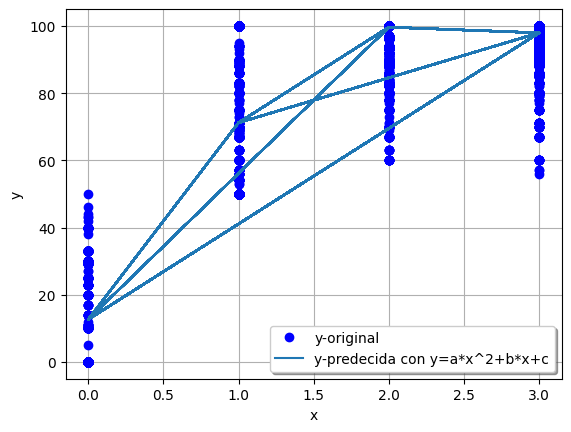

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
R2_Modelo1

0.8425367288831603

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

0.9178979948137812

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_response_time_num']]
Var_Dep= df['host_response_rate']

# Función Polinomial Inversa

In [ ]:
def func2(x, a, b, c):
    return a / b * x**2 + c * x

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['host_response_time_num'], df['host_response_rate'])


In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-15.56002734,   0.86827161,  86.39513184])

In [ ]:
# Predicciones
y_pred2 = func2(x, *parametros2)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred2

,host_response_time_num
0,97.899175
1,0.000000
2,97.899175
3,97.899175
4,68.474441
...,...
26531,97.899175
26532,97.899175
26533,97.899175
26534,97.899175


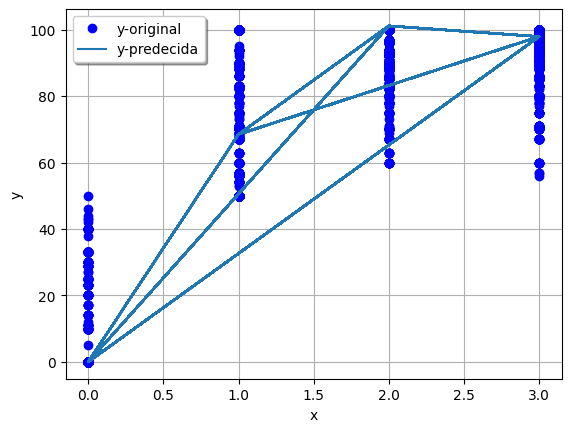

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred2, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()


In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2)
R2_Modelo2


0.8236893454282059

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

0.9075733278519185

**En el modelo de regresion lineal se tuvieron los siguientes coeficientes;**

R² = 0.6311156127614912
R = 0.7944278524582904

**Resultados función cuadrática;**

R² = 0.8425367288831603
R = 0.9178979948137812

**Resultados función polinomial inversa;**

R² = 0.8236893454282059
R = 0.9075733278519185



# **Correlación host_acceptance_rate vs instant_bookable**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['instant_bookable']]
Var_Dep= df['host_acceptance_rate']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

# Función valor absoluto

In [ ]:
def func3(x, a, b, c):
    return a * np.abs(x) + b * x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros3, covs3= curve_fit(func3, df['instant_bookable'], df['host_acceptance_rate'])



In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros3

array([-113.89329206,  126.97068762,   84.63803246])

In [ ]:
# Predicciones
y_pred3 = func3(x, *parametros3)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred3

,instant_bookable
0,84.638032
1,84.638032
2,84.638032
3,97.715428
4,84.638032
...,...
26531,97.715428
26532,84.638032
26533,84.638032
26534,84.638032


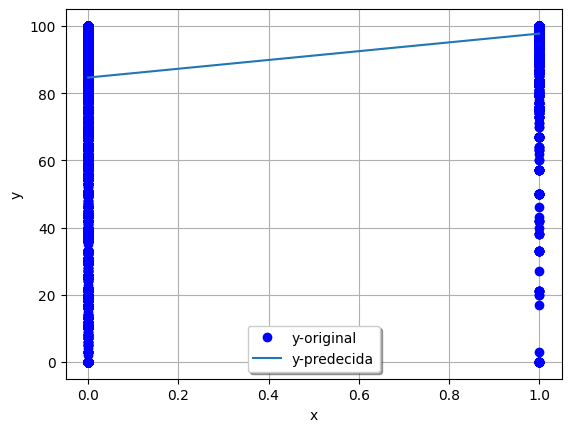

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred3, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()



In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo3 = r2_score(y, y_pred3)
R2_Modelo3


0.0849559955682696

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo3)
R

0.29147211799461986

# Función cuadrática

In [ ]:
def func4 (x, a, b, c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros4, covs4= curve_fit(func4, df['instant_bookable'], df['host_acceptance_rate'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros4

array([-113.89329206,  126.97068762,   84.63803246])

In [ ]:
# Predicciones
y_pred4 = func4(x, *parametros4)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred4

,instant_bookable
0,84.638032
1,84.638032
2,84.638032
3,97.715428
4,84.638032
...,...
26531,97.715428
26532,84.638032
26533,84.638032
26534,84.638032


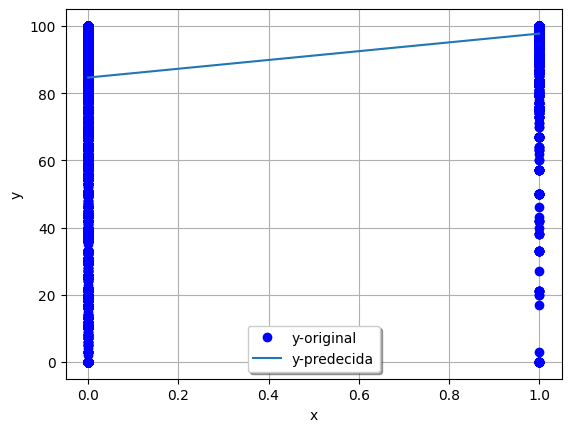

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred4, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()



In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo4 = r2_score(y, y_pred4)
R2_Modelo4


0.0849559955682696

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo4)
R

0.29147211799461986

**En el modelo de regresion lineal se tuvieron los siguientes coeficientes;**

R² = 0.08495599556826938
R = 0.2914721179946195

**Resultados función valor absoluto;**

R² = 0.0849559955682696
R = 0.29147211799461986

**Resultados función cuadrática;**

R² = 0.0849559955682696
R = 0.29147211799461986

# **Correlación host_total_listings_count vs calculated_host_listings_count**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['calculated_host_listings_count']]
Var_Dep= df['host_total_listings_count']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

# Función polinomial inversa

In [ ]:
def func5(x, a, b, c):
    return a / b * x**2 + c * x

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros5, covs5= curve_fit(func5, df['calculated_host_listings_count'], df['host_total_listings_count'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros5

array([ -0.64181588, 114.64671598,   2.11094277])

In [ ]:
# Predicciones
y_pred5 = func5(x, *parametros5)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred5

,calculated_host_listings_count
0,6.282444
1,2.105345
2,26.496159
3,2.105345
4,4.199493
...,...
26531,16.529257
26532,22.542988
26533,2.105345
26534,6.282444


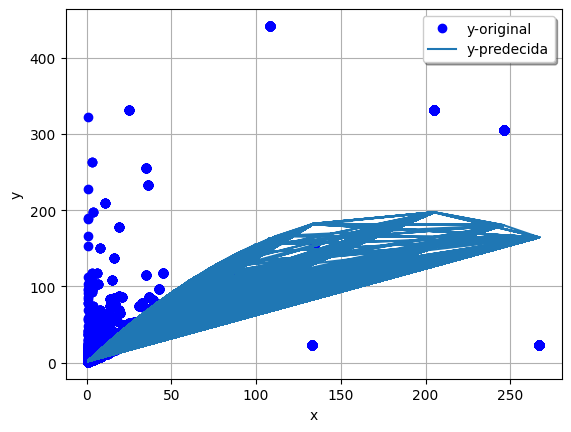

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred5, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo5 = r2_score(y, y_pred5)
R2_Modelo5

0.5808294075854121

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo5)
R

0.7621216488103537

# Función Cuadrática

In [ ]:
def func6 (x, a, b, c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros6, covs6= curve_fit(func6, df['calculated_host_listings_count'], df['host_total_listings_count'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros6

array([-0.0058006 ,  2.16654034, -1.74082953])

In [ ]:
# Predicciones
y_pred6 = func6(x, *parametros6)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred6

,calculated_host_listings_count
0,4.706586
1,0.419910
2,25.443893
3,0.419910
4,2.569049
...,...
26531,15.220255
26532,21.389241
26533,0.419910
26534,4.706586


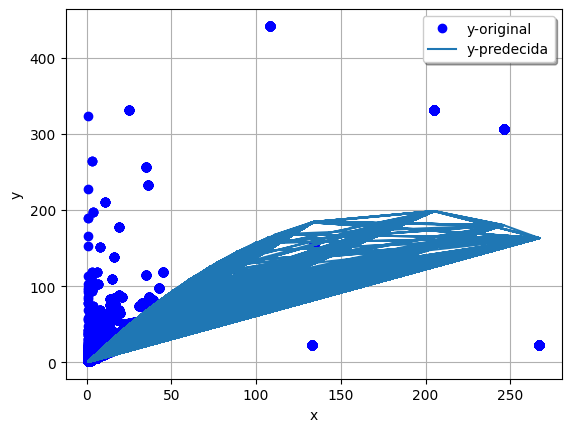

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred6, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo6 = r2_score(y, y_pred6)
R2_Modelo6

0.5815080926474776

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo6)
R

0.762566779139688

**En el modelo de regresion lineal se tuvieron los siguientes coeficientes;**

R² = 0.478054444095079
R = 0.6914148133321119

**Resultados función Polinomial inversa;**

R² = 0.5808294075854121
R = 0.7621216488103537

**Resultados función cuadrática;**

R² = 0.5815080926474776
R = 0.762566779139688

# **Correlación accommodates vs beds**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['beds']]
Var_Dep= df['accommodates']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

# Función cuadrática

In [ ]:
def func7 (x, a, b, c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros7, covs7= curve_fit(func7, df['beds'], df['accommodates'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros7

array([0.05616343, 0.802934  , 1.58407738])

In [ ]:
# Predicciones
y_pred7 = func7(x, *parametros7)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred7

,beds
0,3.414599
1,2.443175
2,3.414599
3,4.498350
4,3.414599
...,...
26531,3.414599
26532,3.414599
26533,2.443175
26534,3.414599


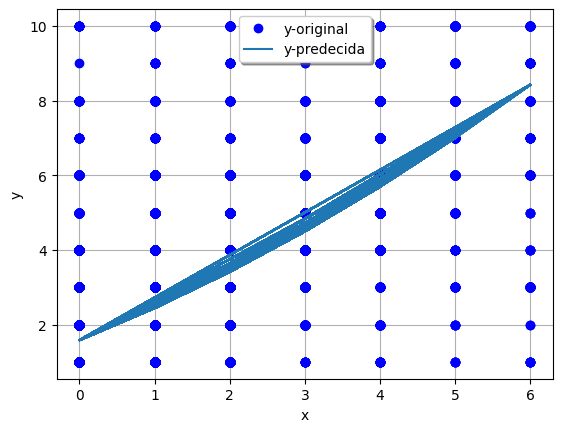

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred7, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo7 = r2_score(y, y_pred7)
R2_Modelo7

0.4543937814942459

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo7)
R

0.6740873693329715

# Función Valor absoluto

In [ ]:
def func8(x, a, b, c):
    return a * np.abs(x) + b * x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros8, covs8= curve_fit(func8, df['beds'], df['accommodates'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros8

array([-105.63998568,  106.71122755,    1.36278269])

In [ ]:
# Predicciones
y_pred8 = func8(x, *parametros8)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred8

,beds
0,3.505266
1,2.434025
2,3.505266
3,4.576508
4,3.505266
...,...
26531,3.505266
26532,3.505266
26533,2.434025
26534,3.505266


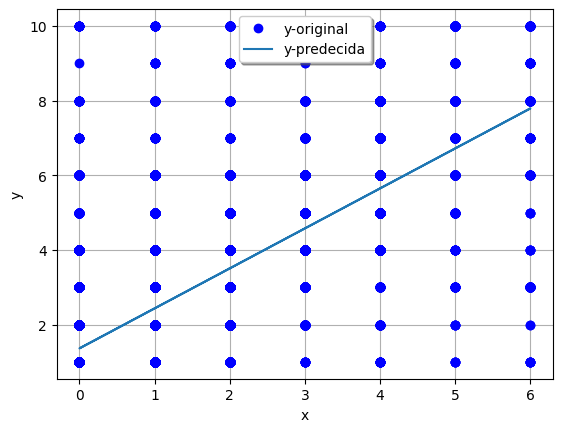

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred8, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo8 = r2_score(y, y_pred8)
R2_Modelo8

0.45094488913237507

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo8)
R

0.6715243027116554

**En el modelo de regresion lineal se tuvieron los siguientes coeficientes;**

R² = 0.4509448891323746
R = 0.6715243027116551

**Resultados función cuadrática;**

R² = 0.4543937814942459
R = 0.6740873693329715

**Resultados función valor absoluto;**

R² = 0.45094488913237507
R = 0.6715243027116554



# **Correlación reviews_per_month vs number_of_reviews_ltm**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['number_of_reviews_ltm']]
Var_Dep= df['reviews_per_month']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

# Funcion exponencial

In [ ]:
def func9(x, a, b, c):
    return a * np.exp(-b * x) + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros9, covs9= curve_fit(func9, df['number_of_reviews_ltm'], df['reviews_per_month'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros9

array([-3.89825392,  0.02681853,  4.4602384 ])

In [ ]:
# Predicciones
y_pred9 = func9(x, *parametros9)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred9

,number_of_reviews_ltm
0,0.863336
1,0.561984
2,0.561984
3,1.141391
4,0.958517
...,...
26531,0.561984
26532,0.561984
26533,0.561984
26534,0.561984


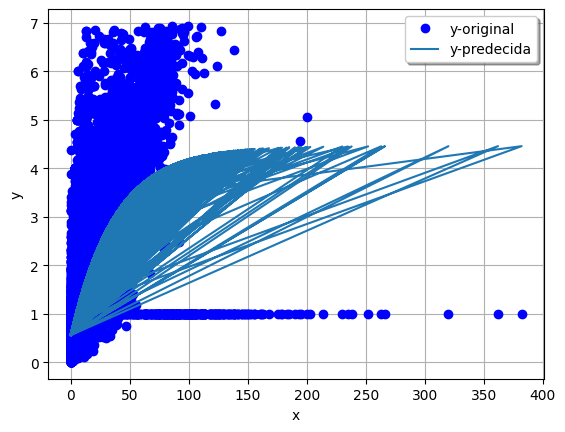

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred9, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo9 = r2_score(y, y_pred9)
R2_Modelo9

0.5797344216302929

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo9)
R

0.761402929880292

# Función cuadrática

In [ ]:
def func10 (x, a, b, c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros10, covs10= curve_fit(func10, df['number_of_reviews_ltm'], df['reviews_per_month'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros10

array([-3.09687597e-04,  7.23664236e-02,  6.75817793e-01])

In [ ]:
# Predicciones
y_pred10 = func10(x, *parametros10)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred10

,number_of_reviews_ltm
0,0.890130
1,0.675818
2,0.675818
3,1.098868
4,0.960328
...,...
26531,0.675818
26532,0.675818
26533,0.675818
26534,0.675818


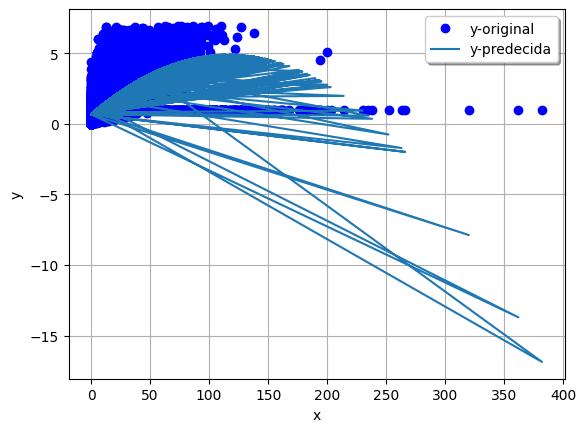

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred10, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo10 = r2_score(y, y_pred10)
R2_Modelo10

0.5688060614482711

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo10)
R

0.7541923239123235

**En el modelo de regresion lineal se tuvieron los siguientes coeficientes;**

R² = 0.4417380063462446
R = 0.6646337384953044

**Resultados función Exponencial;**

R² = 0.5797344216302929
R = 0.761402929880292

**Resultados función cuadrática;**

R² = 0.5688060614482711
R = 0.7541923239123235



# **Correlación price vs bathrooms**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['bathrooms']]
Var_Dep= df['price']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

# Función polinomial inversa

In [ ]:
def func11(x, a, b, c):
    return a / b * x**2 + c * x

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros11, covs11= curve_fit(func11, df['bathrooms'], df['price'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros11

array([1692.57191131,  -95.07341369,  872.0307413 ])

In [ ]:
# Predicciones
y_pred11 = func11(x, *parametros11)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred11

,bathrooms
0,854.227952
1,854.227952
2,4257.634714
3,854.227952
4,854.227952
...,...
26531,3563.631861
26532,854.227952
26533,854.227952
26534,1267.989837


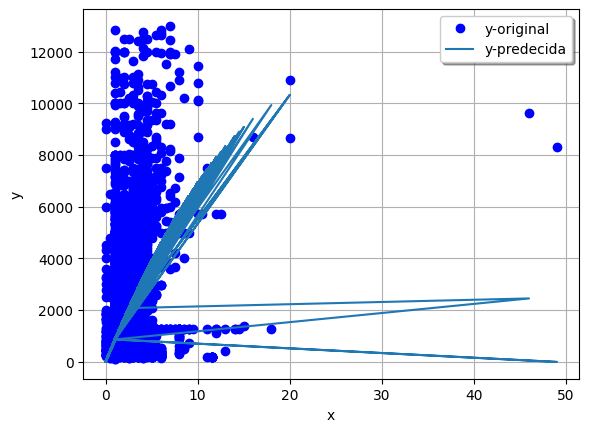

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred11, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo11 = r2_score(y, y_pred11)
R2_Modelo11

0.17322211952845556

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo11)
R

0.4161996150027719

# Función cuadrática

In [ ]:
def func12 (x, a, b, c):
  return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros12, covs12= curve_fit(func12, df['bathrooms'], df['price'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros12

array([-11.79517178, 661.05734379, 368.71053572])

In [ ]:
# Predicciones
y_pred12 = func12(x, *parametros12)

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred12

,bathrooms
0,1017.972708
1,1017.972708
2,3647.721980
3,1017.972708
4,1017.972708
...,...
26531,3104.616354
26532,1017.972708
26533,1017.972708
26534,1333.757415


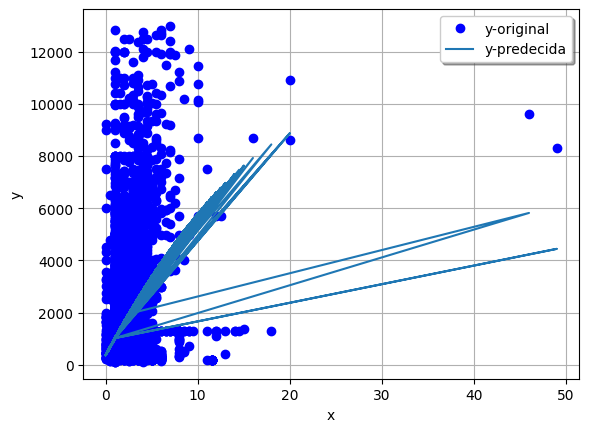

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred12, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo12 = r2_score(y, y_pred12)
R2_Modelo12

0.1960860488224273

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo12)
R

0.4428160439984388

**En el modelo de regresion lineal se tuvieron los siguientes coeficientes;**

R² = 0.17121025344359486
R = 0.41377560759860516

**Resultados polinomial inversa;**

R² = 0.17322211952845556
R = 0.4161996150027719

**Resultados función cuadrática;**

R² = 0.1960860488224273
R = 0.4428160439984388